In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

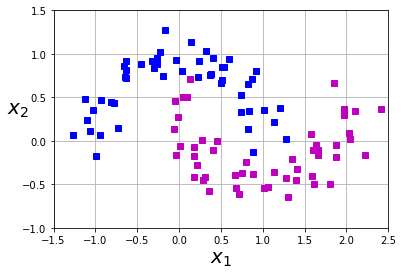

In [3]:
def plot_dataset(X, y, axes):
 plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
 plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
 plt.axis(axes)
 plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
def plot_predictions(clf, axes):
 x0s = np.linspace(axes[0], axes[1], 100)
 x1s = np.linspace(axes[2], axes[3], 100)
 x0, x1 = np.meshgrid(x0s, x1s)
 X = np.c_[x0.ravel(), x1.ravel()]
 y_pred = clf.predict(X).reshape(x0.shape)
 y_decision = clf.decision_function(X).reshape(x0.shape)
 plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
 plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

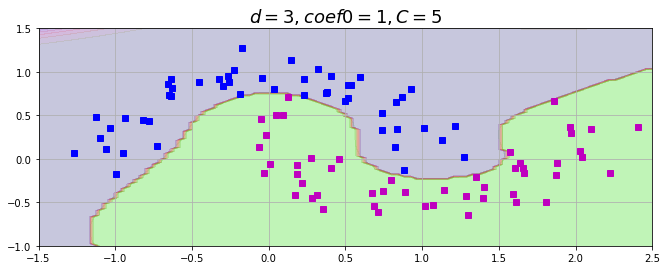

In [6]:
polynomial_svm_clf = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),
("scalar", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5)) ))

polynomial_svm_clf.fit(X,y)

plt.figure(figsize=(11, 4))

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, coef0=1, C=5$", fontsize=18)
plt.show()

In [ ]:
|